In [8]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import math

## Clinical analysis

In [13]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [14]:
df

,PFS_P,PFS_P_CNSR,TRT01P,HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA,PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA
ID,,,,,
X00936b9285d6b8665ae9122993fb8e91,4.172485,0,Avelumab+Axitinib,70.0,0.0
X105622fadc33f23755ac2df823110aca,16.591376,1,Sunitinib,85.0,1.0
Xe44f39747a8e84b02b4cb24659312144,11.104723,0,Sunitinib,80.0,5.0
X293dd1284496215e9a0eca9f17a98e7e,14.028747,1,Sunitinib,60.0,5.0
X01ed7190ce00862696edbf047b542045,12.418891,0,Sunitinib,80.0,2.0
...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,4.271047,0,Sunitinib,75.0,1.0
X91bcd3067a1a7954692d836515e04869,2.496920,0,Sunitinib,50.0,1.0
Xc7439a06ffa32b313b0ec1b987b992a2,6.505133,1,Avelumab+Axitinib,80.0,1.0


In [15]:
df.columns

Index(['PFS_P', 'PFS_P_CNSR', 'TRT01P', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA',
       'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA'],
      dtype='object')

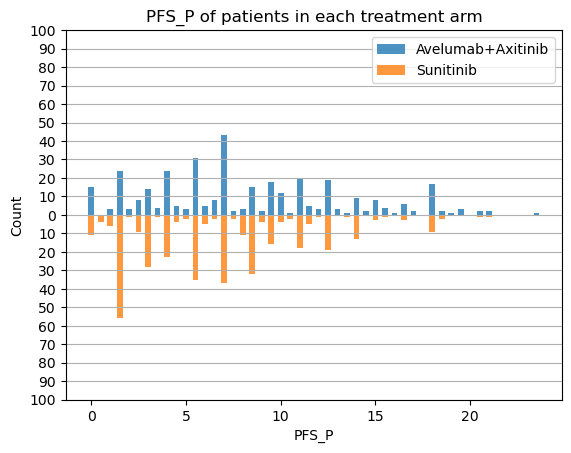

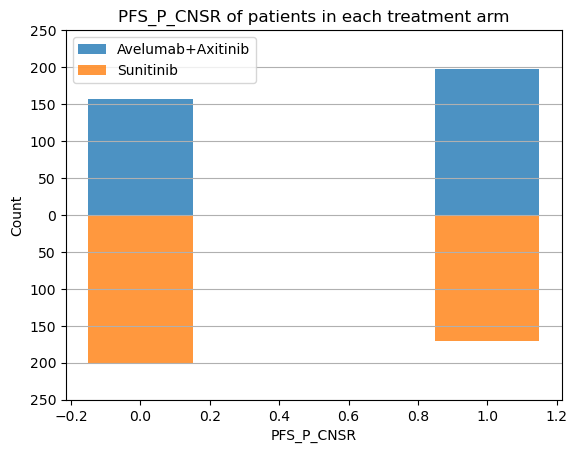

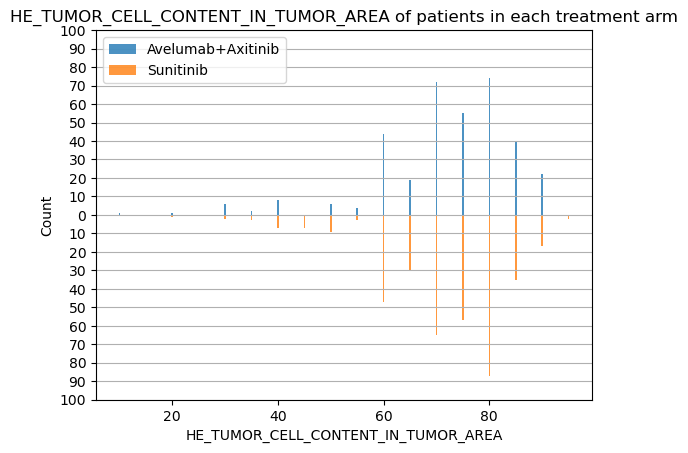

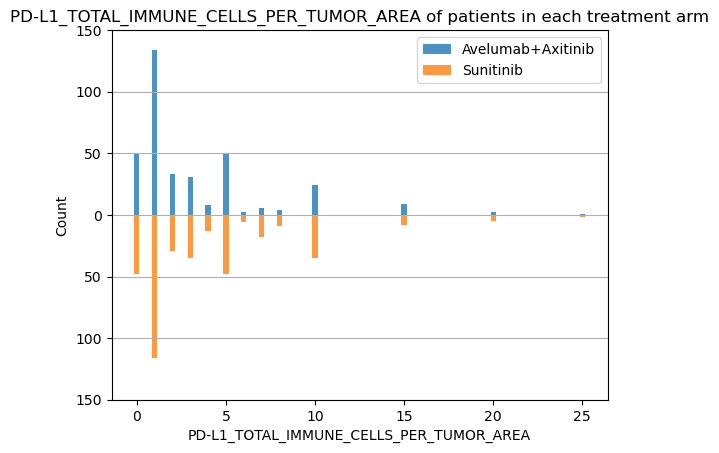

In [16]:
cohorts = [df[df['TRT01P'] == 'Avelumab+Axitinib'], 
           df[df['TRT01P'] == 'Sunitinib']]
names = ['Avelumab+Axitinib', 'Sunitinib']

biomarkers = ['PFS_P', 'PFS_P_CNSR', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA',
              'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA'
             ]

WIDTH = .3

for bio in biomarkers:
    maxCount = -1
    step = 1
    for idx, cohort_df in enumerate(cohorts):
        # round(x * 2) / 2 rounds to the nearest .5 => round(2.4 * 2) / 2 = round(4.8) / 2 = 5 / 2 = 2.5
        rounded_list = None

        nan_values = cohort_df[bio].isna().sum()
        
        values = cohort_df[bio].dropna().values
        if len(set(values)) > 10:
            rounded_list = pd.array([round(x * 2) / 2 for x in values])
        else:
            rounded_list = pd.array([x for x in values])
            
        counts = rounded_list.value_counts()
        
        keys = counts.keys()
        values = counts.values


        
        if (max(max(values),nan_values) > maxCount):
            maxCount = (max(max(values),nan_values) + 50) - (max(max(values),nan_values) % 50)
            
        if idx == 1:
            values = -values
        plt.bar(keys, values, alpha = .8, width = WIDTH, label = names[idx])
        
        # Plot gray bars for NaN values
        if nan_values > 0:
            plt.bar(-1, nan_values, alpha=.8, width= WIDTH, color='gray', label='NaN' if idx == 0 else '', bottom=-nan_values if idx == 0 else 0)

    if (maxCount > 100):
        step = 50
    else:
        step = 10
    
    plt.yticks(np.arange(-maxCount,maxCount+(step-1),step), abs(np.arange(-maxCount,maxCount+(step-1),step)))
    plt.title(bio + " of patients in each treatment arm")
    plt.xlabel(bio)
    plt.ylabel("Count")
    plt.grid(axis = 'y')
    plt.legend()
    plt.show()

In [17]:
a = df['TCGA_cluster'].fillna(-1)
a[a == -1]

KeyError: 'TCGA_cluster'

In [18]:
set(df['TCGA_cluster'])

KeyError: 'TCGA_cluster'

## Genetic analysis

In [19]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_GeneticData.csv'

# Read the CSV file into a DataFrame
try:
    df_gen = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [20]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df_cli = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [21]:
df_gen

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
X00936b9285d6b8665ae9122993fb8e91,2.91,2.41,4.71,10.78,2.02,0.01,0.01,7.18,0.01,6.22,...,3.18,3.96,3.82,3.83,2.86,0.01,4.12,8.23,5.45,5.26
X105622fadc33f23755ac2df823110aca,9.61,0.71,5.99,11.20,0.45,0.01,0.70,3.93,0.01,5.67,...,2.62,2.59,3.64,4.10,2.86,1.32,4.36,7.66,5.39,5.03
Xe44f39747a8e84b02b4cb24659312144,2.75,2.48,1.46,11.18,2.00,0.01,1.37,4.95,0.01,6.32,...,3.07,2.89,4.18,3.87,3.59,0.01,4.31,9.11,5.78,5.26
X293dd1284496215e9a0eca9f17a98e7e,2.17,0.69,0.01,10.89,1.57,0.01,0.49,5.14,1.62,6.36,...,3.04,3.18,4.40,3.93,3.92,0.43,4.16,8.66,6.04,5.13
X01ed7190ce00862696edbf047b542045,1.44,1.83,2.35,10.11,2.33,0.01,0.27,6.05,0.01,6.49,...,2.43,2.51,4.19,3.89,3.34,0.01,4.45,8.28,5.56,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,0.88,0.16,4.16,10.06,1.69,0.01,0.01,6.18,0.01,5.91,...,3.06,2.84,4.19,3.68,3.26,3.30,4.57,8.23,5.51,5.66
X91bcd3067a1a7954692d836515e04869,1.33,1.16,0.01,9.96,1.64,0.01,1.35,5.57,0.01,6.14,...,4.06,4.12,3.38,3.47,3.60,0.01,4.06,8.17,5.81,5.26
Xc7439a06ffa32b313b0ec1b987b992a2,1.74,0.56,1.20,8.96,0.64,0.01,0.01,5.98,0.01,6.16,...,3.01,3.77,4.44,4.30,2.92,0.21,4.34,7.93,5.10,5.02
X21a6043653d187f8bbead475d2f49791,1.80,1.55,3.14,10.25,1.69,0.01,3.23,6.59,0.01,6.18,...,3.82,4.24,4.14,3.52,3.06,0.01,4.39,9.07,5.92,5.93


In [22]:
df_cli

,PFS_P,PFS_P_CNSR,TRT01P,HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA,PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA
ID,,,,,
X00936b9285d6b8665ae9122993fb8e91,4.172485,0,Avelumab+Axitinib,70.0,0.0
X105622fadc33f23755ac2df823110aca,16.591376,1,Sunitinib,85.0,1.0
Xe44f39747a8e84b02b4cb24659312144,11.104723,0,Sunitinib,80.0,5.0
X293dd1284496215e9a0eca9f17a98e7e,14.028747,1,Sunitinib,60.0,5.0
X01ed7190ce00862696edbf047b542045,12.418891,0,Sunitinib,80.0,2.0
...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,4.271047,0,Sunitinib,75.0,1.0
X91bcd3067a1a7954692d836515e04869,2.496920,0,Sunitinib,50.0,1.0
Xc7439a06ffa32b313b0ec1b987b992a2,6.505133,1,Avelumab+Axitinib,80.0,1.0


In [63]:
df_cli[df_cli['TRT01P'] == 'EVEROLIMUS']

,TRT01P,PFS_P,PFS_P_CNSR
RNA_ID,,,
EA639156,EVEROLIMUS,37.749487,1
P66425-01A-Run1_S1_L001,EVEROLIMUS,7.195072,1
P66425-08E-Run1_S6_L001,EVEROLIMUS,1.938398,1
P66507-02A-Run1_S22_L002,EVEROLIMUS,1.511294,1
P66425-08C-Run1_S5_L001,EVEROLIMUS,1.872690,1
...,...,...,...
P66511-05F-Run1_S12_L001,EVEROLIMUS,9.166324,1
P66511-01B-Run1_S15_L002,EVEROLIMUS,1.872690,1
P66507-06E-Run1_S12_L001,EVEROLIMUS,1.938398,0


In [65]:
df_cli[df_cli['TRT01P'] == 'NIVOLUMAB']['PFS_P_CNSR'].value_counts()

PFS_P_CNSR
1    159
0     22
Name: count, dtype: int64

In [5]:
gene_vals = [x for X in df_gen.values for x in X]

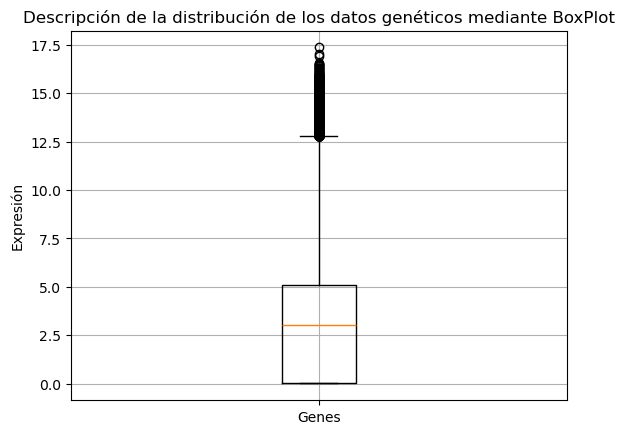

In [16]:
plt.boxplot(gene_vals)
plt.grid(True)
plt.xticks([1], labels=['Genes'])
plt.ylabel("Expresión")
plt.title("Descripción de la distribución de los datos genéticos mediante BoxPlot")
plt.show()

In [17]:
gene_vals = np.array(gene_vals)
mean_val = np.mean(gene_vals)

# Calculate standard deviation
std_val = np.std(gene_vals)

# Calculate median
median_val = np.median(gene_vals)

# Calculate minimum and maximum
min_val = np.min(gene_vals)
max_val = np.max(gene_vals)

# Print the results
print("Mean:", mean_val)
print("Standard Deviation:", std_val)
print("Median:", median_val)
print("Minimum:", min_val)
print("Maximum:", max_val)

Mean: 2.9811656060816065
Standard Deviation: 2.6330352019899554
Median: 3.01
Minimum: 0.01
Maximum: 17.36


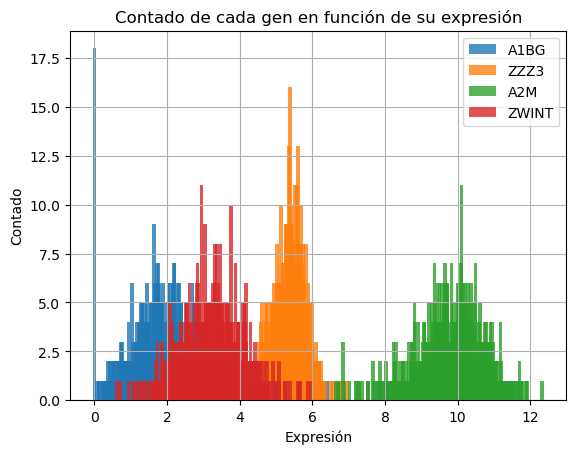

In [18]:
genes = ['A1BG', 'ZZZ3', 'A2M', 'ZWINT']

for gene in genes:
    vals = df_gen[gene].value_counts()
    keys = list(vals.keys())
    values = list(vals.values)
    plt.bar(keys,values,width = .1, label=gene, alpha = 0.8)
    plt.xlabel("Expresión")
    plt.ylabel("Contado")
    plt.title("Contado de cada gen en función de su expresión")
    plt.grid(True)
    plt.legend()

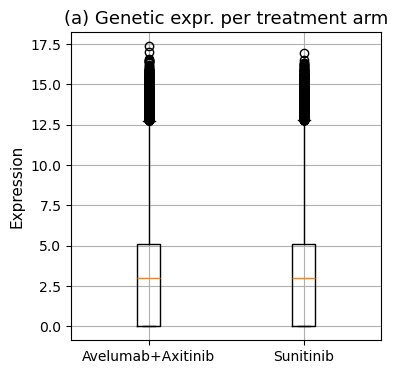

In [28]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
#treatmentGroups = ['NIVOLUMAB', 'EVEROLIMUS']
plt.figure(figsize=(4,4))
for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    x = df_gen.loc[treatment_indices].values.flatten()
    plt.boxplot(x, positions = [idx])
plt.grid(True)
plt.xticks([0, 1], labels=treatmentGroups)
plt.ylabel("Expression", fontsize = 11)
plt.title("(a) Genetic expr. per treatment arm", fontsize = 13)
plt.show()
    

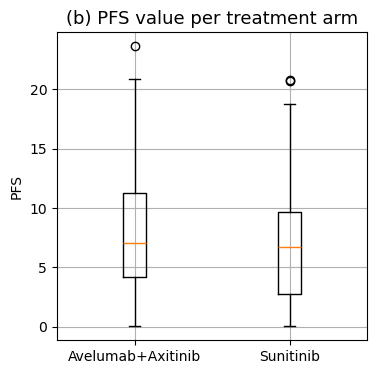

In [30]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
#treatmentGroups = ['NIVOLUMAB', 'EVEROLIMUS']

plt.figure(figsize=(4,4))

for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    x = df_cli.loc[treatment_indices]['PFS_P'].values.flatten()
    plt.boxplot(x, positions = [idx])
plt.grid(True)
plt.xticks([0, 1], labels=treatmentGroups)
plt.ylabel("PFS")
plt.title("(b) PFS value per treatment arm", fontsize = 13)
plt.show()
    

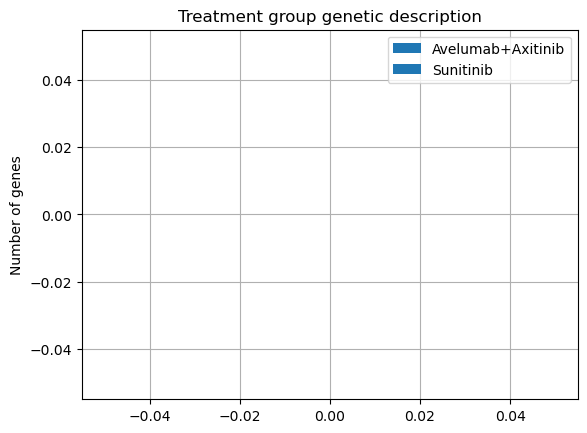

In [41]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
offset = 0.1

for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    vals = df_gen.loc[treatment_indices].values.flatten()
    vals = pd.array([round(x * 2) / 2 for x in vals]).value_counts()
    keys = np.array(vals.keys())
    values = list(vals.values)
    plt.bar(keys + offset * idx,values,width = .1, label=tg)
plt.grid(True)
plt.ylabel("Number of genes")
plt.title("Treatment group genetic description")
plt.legend()
plt.show()

In [42]:
treatment_indices = list(df_cli[df_cli['TRT01P'] == 'Avelumab+Axitinib'].index)
vals = df_gen.loc[treatment_indices]
vals

,A4GALT,AAAS,AAMP,ABCA1,ABCA2,ABCB1,ABCB6,ABCG1,ABCG2,ABI1,...,ZMPSTE24,ZNF106,ZNF24,ZNF274,ZNF473,ZNF513,ZRANB1,ZRSR2,ZW10,ZWINT


In [26]:
df_cli[df_cli['TRT01P'] == 'Sunitinib']['PFS_P_CNSR'].value_counts()

PFS_P_CNSR
0    201
1    171
Name: count, dtype: int64

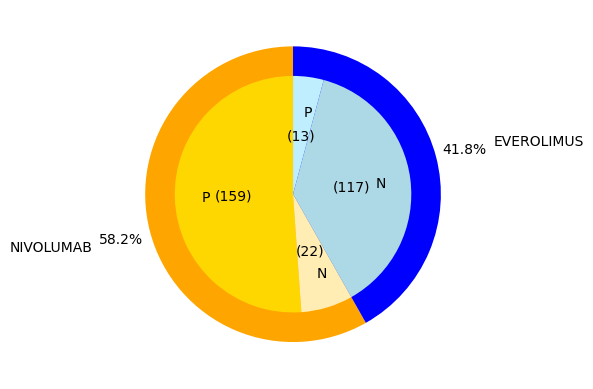

In [47]:
total_length = len(df_cli)
partial_length = -1

def absolute_value(val):
    absolute = np.round(val/100. * total_length, 0)
    return "({:d})".format(int(absolute))

treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
treatmentGroups = ['NIVOLUMAB', 'EVEROLIMUS']
offset = 0.1
colors = ["#FFA500", "#0000FF", "#FFD700", "#FFEDB3", "#ADD8E6", "#BFEFFF"]

res_vals = {'Sizes' : [], 'Censor' : []}

for idx, tg in enumerate(treatmentGroups):
    censor_sizes = df_cli[df_cli['TRT01P'] == tg]['PFS_P_CNSR'].value_counts()
    res_vals['Sizes'] += [len(df_cli[df_cli['TRT01P'] == tg])]
    partial_length = len(df_cli[df_cli['TRT01P'] == tg])
    keys = censor_sizes.keys()
    vals = censor_sizes.values
    res_vals['Censor'].extend(vals)

plt.pie(np.array(res_vals['Sizes']), colors = colors[:2], labels = treatmentGroups, startangle = 90,  autopct='%1.1f%%', labeldistance = 1.4, pctdistance = 1.2)

plt.pie(np.array(res_vals['Censor']), colors = colors[2:], radius = 0.8,  autopct=absolute_value, labels = ['P', 'N', 'N', 'P'], startangle = 90, labeldistance=.7, pctdistance = 0.5)

plt.show()




In [21]:
from scipy.stats import f_oneway

performance1 = [
    0.519, 0.406, 0.606, 0.455, 0.534,
    0.487, 0.695, 0.493, 0.606, 0.636,
    0.608, 0.582, 0.607, 0.556, 0.504,
    0.481, 0.722, 0.530, 0.640, 0.573,
    0.445, 0.528, 0.563, 0.586, 0.512,
    0.548, 0.646, 0.539, 0.623, 0.644,
    0.575, 0.491, 0.578, 0.544, 0.499,
    0.394, 0.488, 0.435, 0.480, 0.392,
    0.551, 0.459, 0.656, 0.524, 0.435,
    0.495, 0.695, 0.453, 0.609, 0.723
]

performance2 = [
    0.513, 0.521, 0.602, 0.507, 0.561,
    0.495, 0.645, 0.521, 0.673, 0.696,
    0.478, 0.553, 0.597, 0.485, 0.525,
    0.453, 0.612, 0.428, 0.649, 0.758,
    0.537, 0.564, 0.605, 0.512, 0.454,
    0.498, 0.611, 0.505, 0.516, 0.718,
    0.627, 0.596, 0.465, 0.564, 0.398,
    0.577, 0.542, 0.512, 0.497, 0.444,
    0.500, 0.560, 0.459, 0.498, 0.550,
    0.446, 0.662, 0.490, 0.719, 0.704
]
 
# Conduct the one-way ANOVA
f_oneway(performance1, performance2)

F_onewayResult(statistic=0.08998153232005941, pvalue=0.7648359802510092)

----------------

In [5]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


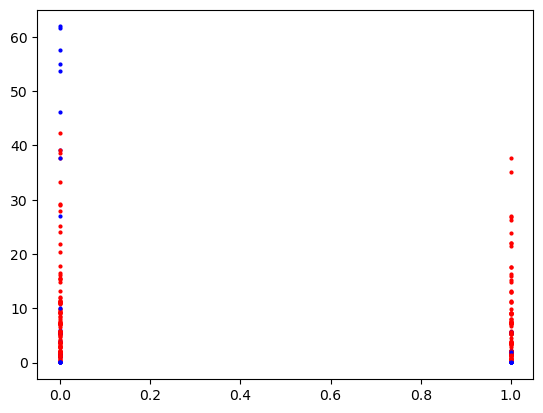

In [17]:
xs = []
ys = []
for pat in df.index:
    x = 0
    clr = 'b'
    if df.loc[pat]['PFS_P_CNSR'] == 1:
        clr = 'r'
    if df.loc[pat]['TRT01P'] == 'NIVOLUMAB':
        plt.plot(0, df.loc[pat]['PFS_P'], 'o', markersize = 2, color = clr)
    else:
        plt.plot(1, df.loc[pat]['PFS_P'], 'o', markersize = 2, color = clr)
plt.show()